# Chapter 4: Training Models
___

In chapters 2 and 3 we used a lot of different models without actually understanding what was going on under the hood, i.e. we had no clue about the underlying mathematics used for creating and training such algorithms. Well, this chapter will expose some of the most essentials and basic algorithms in machine learning, namely: 
+ linear regression
+ polynomial regression
+ logistic regression (used for classification)
+ softmax regression (also used for classification)

## 1. Linear Regression

### **1.1. The Basics**

A linear regression is model based on the computation of the weighted sum of all the input features: 

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$

where: 

+ $\theta_k$ are the weights attributed to each feature $x_k$.
+ $\hat{y}$ is the predicted target variable (the hat means prediction).
+ $\theta_0$ is the bias

objective: the goal of the linear regression is to *find* the correct values for all the parameters $\theta_k$, such that we realize the best predicitions $\hat{y}$.

**Matrix Notation**

In general, we prefer to use linear algebra to write these equations as it is more concise: 
$$
\hat{y} = \theta^T x
$$

where: $\theta^T = [\theta_0, \theta_1, (\cdots), \theta_n]$.  
note that $x_0 = 1$ to preserve the bias.

**Training the Model**

To train the model, we want to minimize the errors we are making, i.e. we want to minimizes the distance between $y$, the target variable, and $\hat{y}$, the predicted target variable. How can we do this? Well, once we have the correct intuition, the answer is quite straightforward. Since we aim to minimize the divergence of $\hat{y}$ from $y$, we select a **loss function** (e.g. the MSE) and we find the vector (the parameters or weights) that minimizes it. Therefore, the optimization problem we face is the following (the MSE is convenient since it is a convex function): 
$$
MSE(\mathbf{X}, h_\theta) = \frac{1}{n} \sum_{i=1}^{n} (\theta^Tx^{(i)} - y^{(i)})^2
$$
where $h_{\theta}$ is the hypothesis for $\theta$.

### **1.2. The Normal Form Equation**

**Solving the Optimization Problem**  

To proceed, we first rewrite our problem in matrix notation: 
$$
\text{mse} = \frac{1}{n} (\mathbf{X}\theta - y)^2
$$
where: 
+ $n$: number of observations 
+ $m$: number of features available for predictions
+ $\mathbf{X}$: feature matrix $(n \times m)$
+ $\theta$: paramter vector $(m \times 1)$ 
+ $y$: target variable vector $(n \times 1)$

$$
\text{MSE} = \frac{1}{n} (X\theta - y)^T (X\theta - y)
$$

Expanding the expression:
$$
\text{MSE} = \frac{1}{n} \left( \theta^T X^T X \theta - y^T X \theta - \theta^T X^T y + y^T y \right)
$$

Since $ (y^T X \theta)^T = \theta^T X^T y $, we have:
$$
\text{MSE} = \frac{1}{n} \left( \theta^T X^T X \theta - 2 \theta^T X^T y + y^T y \right)
$$

Gradient of MSE with respect to $ \theta $:
$$
\nabla_\theta (\text{MSE}) = \frac{1}{n} \left( 2 X^T X \theta - 2 X^T y \right)
$$

Setting the gradient to zero for optimization:
$$
\frac{1}{n} \left( 2 X^T X \theta - 2 X^T y \right) = 0
$$

simplifying:
$$
X^T X \theta = X^T y
$$

Solution for $\theta$:
> $$
> \hat{\theta} = (X^T X)^{-1} X^T y
> $$


This is the **normal equation** or the closed form solution for finding the estimated parameters vector $\hat{\theta}$. Now, let's generate an example for this normal equation: 

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import random as rn
from sklearn.metrics import mean_squared_error as mse

In [39]:
# we build a function that generates linear data: 

def lin_fun(x): 
    # the seed 
    np.random.seed(345)

    # the intercept: 
    h = np.random.uniform(-10,10, size=1)

    # the slope: 
    m = np.random.uniform(-10,10, size=1)

    # the noise: 
    e = np.random.normal(-7, 7, size=len(x))

    # the linear function:
    y = m*x + h + e

    return y

# we generate the data:
x = np.linspace(-10,10,100)
y = lin_fun(x)

Now we plot the data we generated:

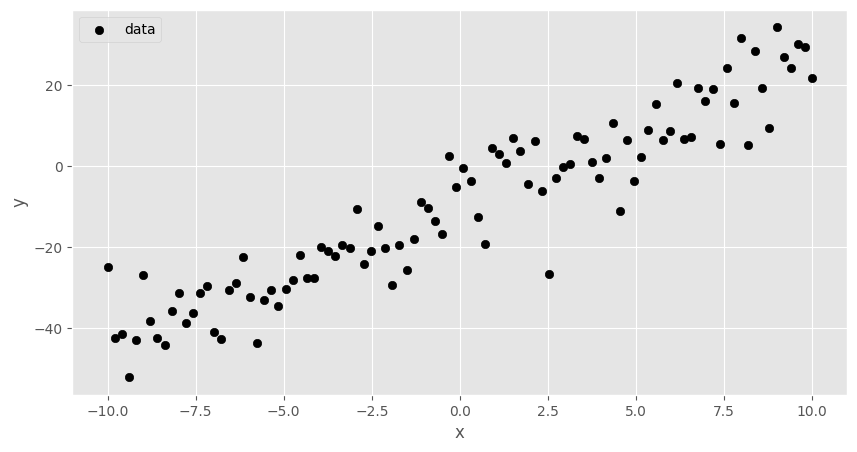

In [40]:
# style: 
plt.style.use('ggplot')

# the plot:
fig, ax = plt.subplots(figsize=(10,5))

# scatter plot:
ax.scatter(x, y, label='data', color='black')

# aesthetics:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

Clearly, even if we were to ignore the fact that we know how the data generating process (`lin_fun(x)`) works, only the visual inspection would tell us that there is a linear pattern in the data between the input variable $x$ and the target variable $y$. Therefore, if we use the linear regression, we will predict the value of $y$ by using this model: 
$$
\hat{y} = \theta_0 + \theta_1 x
$$
In substance, we need to find the intercept ($\theta_0$) and the slope ($\theta_1$) of the regression line. 

In [70]:
# we add a column of ones to the x matrix for the intercept: 
ones = np.ones(len(x))

# we stack the x and ones:
X = np.column_stack((ones, x))

# we calculate the coefficients:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'the slope is: {beta[1]:.3f}\nthe intercept is: {beta[0]:.3f}')

# we calculate the predictions:
y_hat = X @ beta
xs = np.linspace(-10,10,100)

the slope is: 3.462
the intercept is: -9.680


Now that we have computed our linear regression with the normal form equation, we plot the results: 

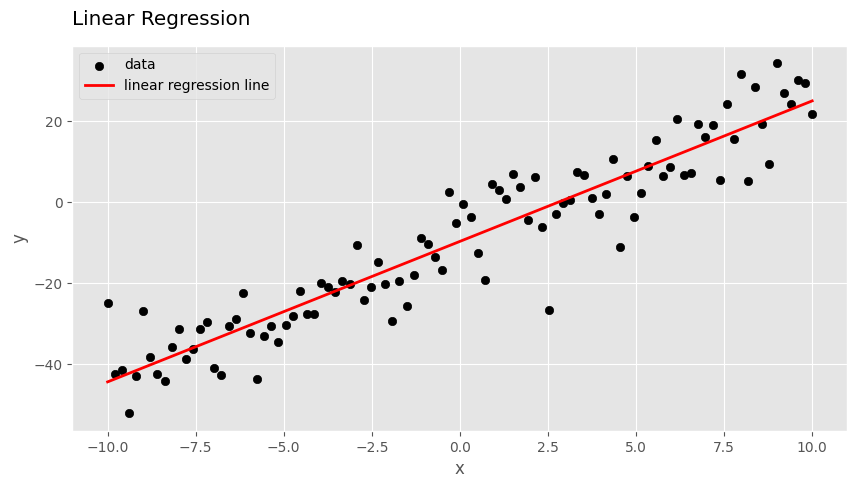

In [71]:
# the basis: 
fig, ax = plt.subplots(figsize=(10,5))

# scatter plot:
ax.scatter(x, y, label='data', color='black')

# linear regression line:
ax.plot(xs, y_hat, label='linear regression line', color='red', linewidth=2)

# aesthetics:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Linear Regression', loc='left', pad=15)
ax.legend()
plt.show()

To evalute the quality of the predictions, we can, as always, compute the root mean squared error (RMSE):

In [72]:
rmse_1 = np.sqrt(np.mean((y - y_hat)**2))
print('The RMSE is: ', round(rmse_1, 3))

The RMSE is:  7.327


Alternatively, we could have produced the same result with `scikit-learn`: 

In [73]:
from sklearn.linear_model import LinearRegression

# we create the linear regression object:
lr = LinearRegression()

# we fit the model:
lr.fit(X, y)

# we calculate the predictions:
y_hat2 = lr.predict(X)

# the mse 
rmse_2 = np.sqrt(np.mean((y - y_hat2)**2))
print('The RMSE is: ', round(rmse_2, 3))

The RMSE is:  7.327


We can also obtain the slope and the intercept: 

In [74]:
lr.coef_, lr.intercept_

(array([0.        , 3.46154045]), np.float64(-9.67955514952691))

And plot the exact same results: 

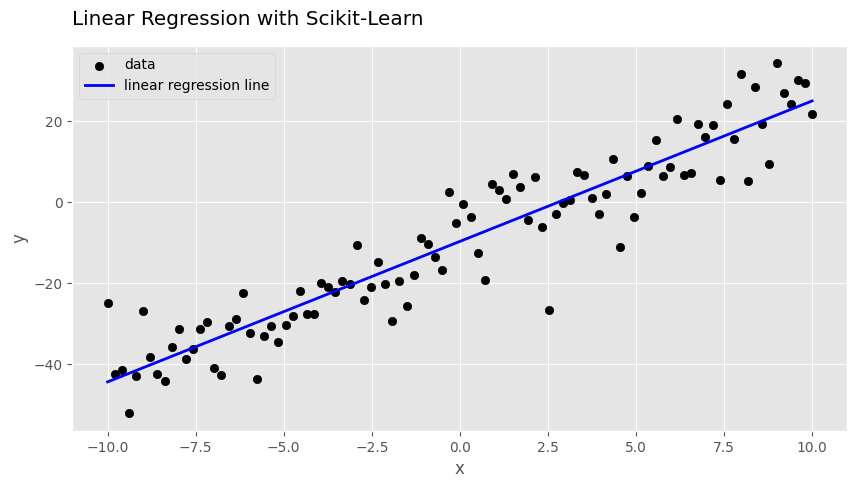

In [76]:
# the basis: 
fig, ax = plt.subplots(figsize=(10,5))

# scatter plot:
ax.scatter(x, y, label='data', color='black')

# linear regression line:
ax.plot(xs, y_hat2, label='linear regression line', color='blue', linewidth=2)

# aesthetics:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Linear Regression with Scikit-Learn', loc='left', pad=15)
ax.legend()
plt.show()

Note that the `LinearRegression()` provided by `scikit-learn` is more powerful than our simple formula since it is not directly based on a formula containing an inverse matrix but based on the *pseudoinverse* (the Moore-Penrose inverse), therefore, this makes this function resilient against singular $\mathbf{X}$. Furthermore, this function is also better since it involves less **computational complexity**. Hence, as the number of observations and features grow, the function provided by `scikit-learn` will become more and more efficient.

> 🔴 To learn more about pseudoinverses and singular value decomposition, see (Strang, 2023, pp. 286-302).

**Intermediate Conclusion**  

Now that we have studied how to *train* a linear regression model with the normal form equation, we will approach another manner to do so named **gradient descent**. This method is far more effective when handling large numbers of features or big instances to fit into memory. 

### **1.3. Gradient Descent**

**Illustrative Scenario:**  

Suppose your are located on a foggy mountain, you can't see around, and you want to find the quickest way possible to go downhill. Well, the good approach would to take the direction of the **steepest descent** at each step. This is exactly what the gradient descent means. It will seek to minimize the loss function at every *step* it makes depending on the parameter $\theta$. Once the gradient is $0$, we know that we have reached a minimum!

**Intuition**  

In practice, we start with a random vector $\theta$ and then we *update* the vector at each iteration (in the direction of the steepest descent, i.e. the negative of the gradient of the loss function with respect to the parameter $\theta$): 



![][one]

[one]: https://mlpills.dev/wp-content/uploads/2022/10/CaIB7lz-h.jpg

**The Learning Rate $\eta$: an Important Hyperparameter**

As we can see in this picture, one important hyperparameter of the gradient descent technique is the learning rate conventionally written as $\eta$. If we set $\eta$ too small, we would need a large number of iterations for the algorithms to converge. On the other hand, if we set an $\eta$ too big, it is possible that we will never converge to the $\theta$ that minimizes the mse because it will overshot each time it is close enough from the optimal $\theta$:

![][two]

[two]: https://images.javatpoint.com/tutorial/machine-learning/images/gradient-descent-in-machine-learning3.png

**The Shortcomings of Gradient Descent**  

Depending on the loss function we chose to minimize with respect to the parameters of the model, it is possible that we will face two kinds of issues: 
+ reaching a local minimum 
+ being stuck in a *plateau*

![][three]

[three]: https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ae/b0/ICLH_Diagram_Batch_03_22-AI-ML-GradientDescent.png

**Note**: The MSE is advantageous because it is a convex function with one global minimum and no plateau!

#### **1.3.1. Batch Gradient Descent**

To compute the batch gradient descent, we need to take the partial derivative of the loss function (in our case the MSE) with respect to all the different parameters $\theta_j$. In other words, we will repeat the same process as before and take the gradient of the MSE with respect to $\theta$: 

We have the mse in matrix form: 
$$
\text{MSE}(\theta) = \frac{1}{n}(X\theta - y)^2 = (X\theta - y)^T(X\theta - y)
$$
Then, we reinvest the results we presented in introduction and we obtain: 
$$
\nabla_\theta (\text{MSE}) = \frac{1}{n} \left( 2 X^T X \theta - 2 X^T y \right) = \frac{2}{n} X^T \left( X \theta - y\right)
$$

Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step. As a result it is terribly slow on very large training sets (but we will see much faster Gradient Descent algorithms shortly). However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

Now, we create a function to compute this gradient: 

In [77]:
def gradient(X, y, theta): 
    n = len(X)
    gradient = (2/n) * X.T @ (X @ theta - y)
    return gradient

Now that we have a python function for computing the gradient, we should also note the algorithm that updates the gradient: 
$$
\theta_{t+1} = \theta_t - \eta \nabla_\theta (\mathcal{L(y, \hat{y})}), \quad \text{ where } L(y, \hat{y}) \text{ is the loss function.} 
$$
In our case, we have: 
$$
\theta_{t+1} = \theta_t - \eta \left( \frac{2}{n} X^T \left( X \theta - y\right) \right)
$$
Therefore, we can implement this algorithm with the data we generated before. Remember that the convergence criteria is that $\nabla_\theta (\mathcal{L(y, \hat{y})}) \approx 0$.

In [220]:
# we initialize the parameters:
t = 0
max_t = 1000
theta = np.zeros(X.shape[1])
eta = 0.01
n = len(X)

# we initialize the list to store the loss:
losses = []
losses.append(mse(y, X @ theta))
iterations = []
iterations.append(t)
thetas = []
thetas.append(theta)
grads = []
grads.append(gradient(X, y, theta))

# we iterate over the number of epochs:
while t < max_t or np.linalg.norm(gradient(X, y, theta)) > 1e-10: # close to zero
    # we compute the gradient: 
    grad = gradient(X, y, theta)
    grads.append(grad)

    # we update the parameters:
    theta = theta - eta * grad
    thetas.append(theta)

    # we compute the loss:
    l = mse(y, X @ theta)
    losses.append(l)

    # we update the iteration:
    t += 1
    iterations.append(t)

print(theta)
thetas = np.array(thetas)


[-9.67955515  3.46154045]


It seems that we obtain almost the same parameters than with our previous linear regressions! To visualize better how the algorithm is working, we can also plot the evolution of $\theta$, the gradient, and the loss across time $t$ (i.e. the number of iterations):

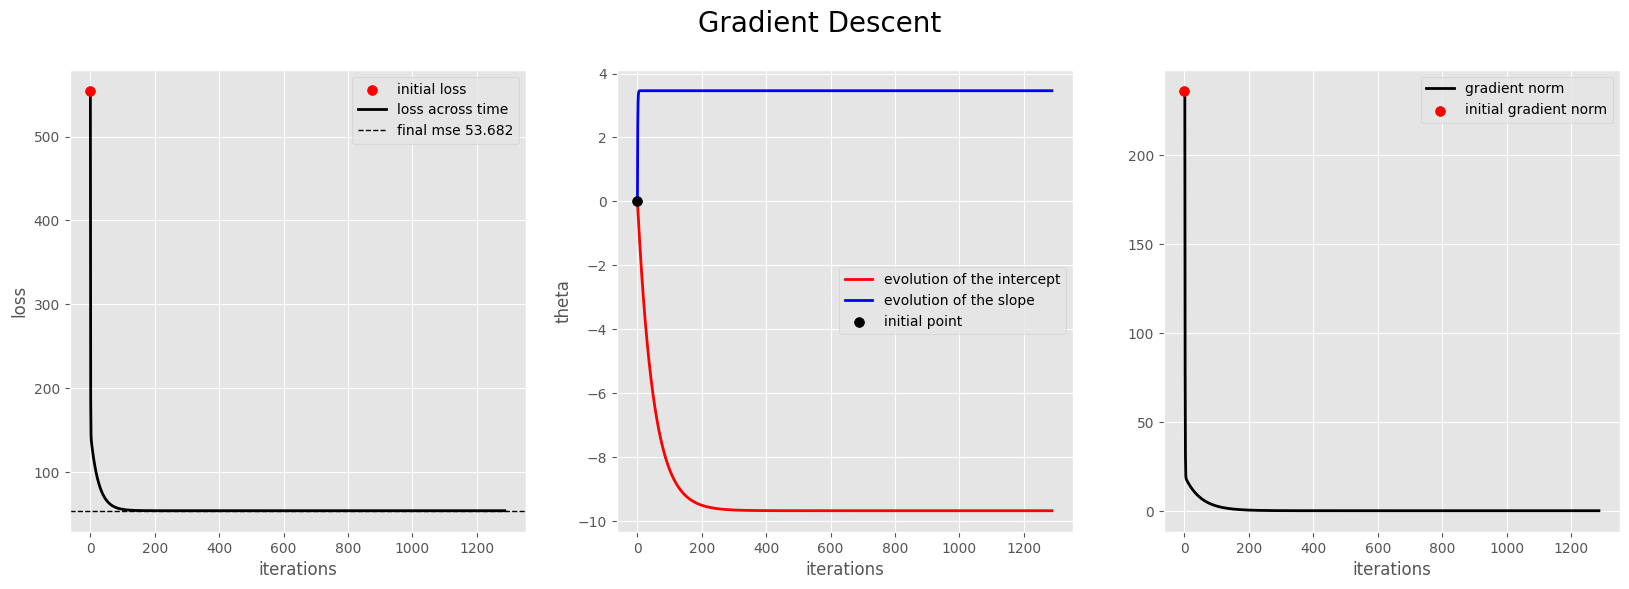

In [221]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))

# plot 1:
# initial point:
ax[0].scatter(iterations[0], losses[0], color='red', s=50, label='initial loss', zorder=3)
ax[0].set_ylabel('loss')

# plot: 
ax[0].plot(iterations, losses, color='black', linewidth=2, label='loss across time', zorder=2)

# final mse:
ax[0].axhline(losses[len(losses)-1], color='black', linewidth=1, linestyle='--', zorder=1, label=f'final mse {losses[len(losses)-1]:.3f}')

# plot 2:
ax[1].plot(iterations, thetas[:, 0], color = 'red', linewidth=2, label='evolution of the intercept', zorder=3)
ax[1].plot(iterations, thetas[:, 1], color = 'blue', linewidth=2, label='evolution of the slope', zorder=2)
ax[1].scatter(0, 0, color='black', s=50, label='initial point', zorder=4)
ax[1].set_ylabel('theta')

# plot 3:
ax[2].plot(iterations, [np.linalg.norm(g) for g in grads], color='black', linewidth=2, label='gradient norm', zorder=2)
ax[2].scatter(iterations[0], np.linalg.norm(grads[0]), color='red', s=50, label='initial gradient norm', zorder=3)

# aesthetics:
for i in range(0,3):
    ax[i].set_xlabel('iterations')
    ax[i].legend()

plt.suptitle('Gradient Descent', fontsize=20)
plt.show()

**How changing the learning rate $\eta$ affects the speed of convergence?**

Another interesting thing to study is how the number of iterations change when we vary the learning rate $\eta$. To experiment, we reproduce the same code as before but with a focus on the number of iterations: 

In [234]:
etas = np.linspace(0.001, 0.3, 1000)
total_iterations = []
max_t = 5000  # safeguard against non-convergence
grad_norms = []
for eta in etas:
    theta = np.zeros(X.shape[1])
    t = 0
    
    while np.linalg.norm(gradient(X, y, theta)) > 1e-10 and t < max_t:
        grad = gradient(X, y, theta)
        theta = theta - eta * grad

        # update the epoch t
        t += 1
    
    total_iterations.append(t)
    grad_norms.append(np.linalg.norm(gradient(X, y, theta)))



/var/folders/7v/_v_y1jpx0rl056gg5rkjsw4r0000gn/T/ipykernel_15538/515921209.py:3: RuntimeWarning: overflow encountered in matmul
  gradient = (2/n) * X.T @ (X @ theta - y)
/var/folders/7v/_v_y1jpx0rl056gg5rkjsw4r0000gn/T/ipykernel_15538/515921209.py:3: RuntimeWarning: invalid value encountered in matmul
  gradient = (2/n) * X.T @ (X @ theta - y)


Then, we plot the different etas against the number of iterations required for convergence:  

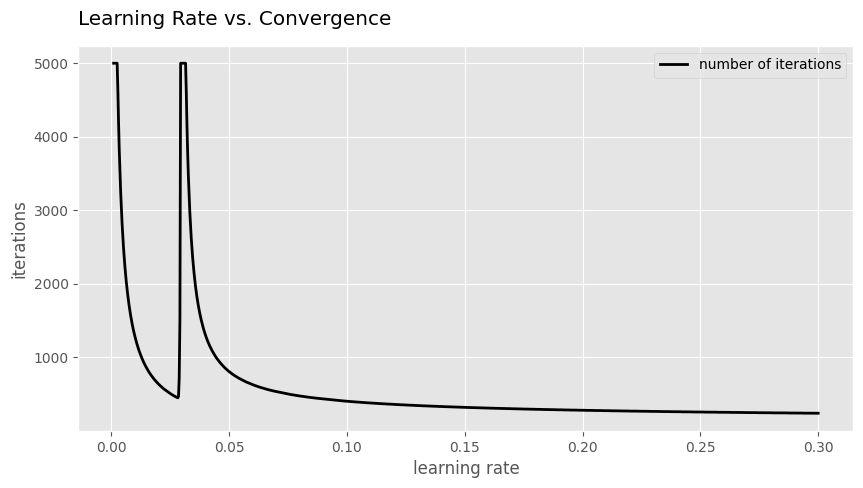

In [ ]:
# the basis
fig, ax = plt.subplots(figsize=(10,5))

# plot the number of iterations:
ax.plot(etas, total_iterations, color='black', linewidth=2, label='number of iterations')


# aesthetics:
ax.set_xlabel('learning rate')
ax.set_ylabel('iterations')
ax.set_title('Learning Rate vs. Convergence', loc='left', pad=15)
ax.legend()
plt.show()

as we can see, we have an overflow warning and if we check the reason behind this overflow warning, we see that this is because the gradient norm is exploding after the threshold of $0.03$:

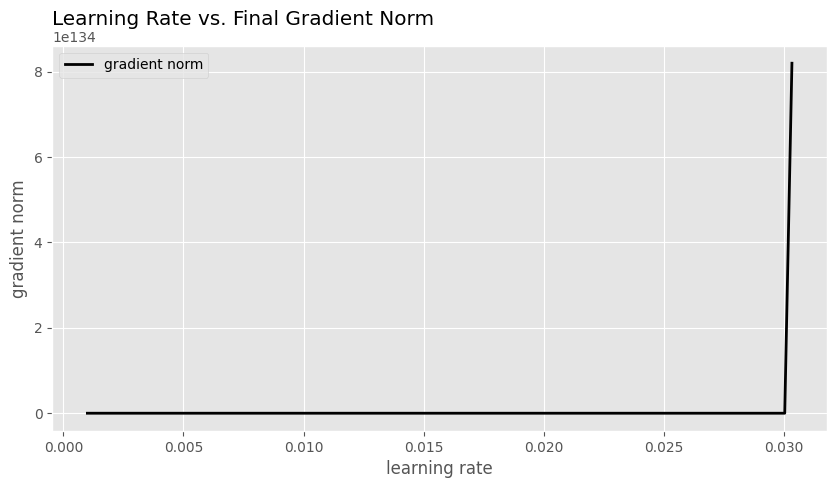

In [237]:
fig, ax = plt.subplots(figsize=(10,5))

# plot the gradient norms:
ax.plot(etas, grad_norms, color='black', linewidth=2, label='gradient norm')

# aesthetics:
ax.set_xlabel('learning rate')
ax.set_ylabel('gradient norm')
ax.set_title('Learning Rate vs. Final Gradient Norm', loc='left', pad=15)
ax.legend()
plt.show()

Now, we could reproduce the same experiment but we remain below the threshold of $0.03$:

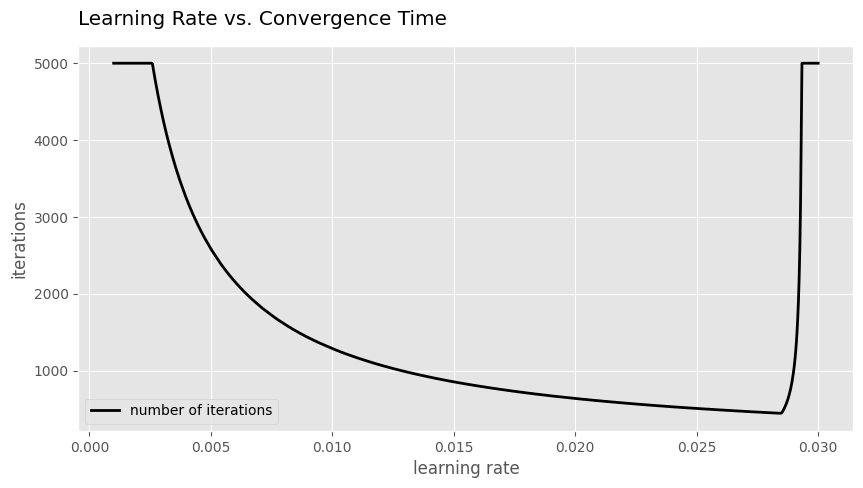

In [239]:
etas = np.linspace(0.001, 0.03, 1000)
total_iterations = []
max_t = 5000  # safeguard against non-convergence
grad_norms = []
for eta in etas:
    theta = np.zeros(X.shape[1])
    t = 0
    
    while np.linalg.norm(gradient(X, y, theta)) > 1e-10 and t < max_t:
        grad = gradient(X, y, theta)
        theta = theta - eta * grad

        # update the epoch t
        t += 1
    
    total_iterations.append(t)
    grad_norms.append(np.linalg.norm(gradient(X, y, theta)))

# the basis plot
fig, ax = plt.subplots(figsize=(10,5))

# plot the number of iterations:
ax.plot(etas, total_iterations, color='black', linewidth=2, label='number of iterations')


# aesthetics:
ax.set_xlabel('learning rate')
ax.set_ylabel('iterations')
ax.set_title('Learning Rate vs. Convergence Time', loc='left', pad=15)
ax.legend()
plt.show()

### **1.3.2. Stochastic Gradient Descent**

The main problem with batch gradient descent is the fact that it uses the whole training set to compute the gradient at every step, which make it very computationally expensive when the dataset is large. At the opposite extreme, ***stochastic gradient descent*** (SGD) picks a random instance in the training set at every step and compute the gradient only based on that single instance. 

This approach will allow us to converge progressively toward the point where the gradient reaches $0$. However, because of its stochastic nature, it won't be like batch gradient descent but more oscillating. Furthermore, at the end of the convergence process it will not settle for the most optimal value but oscillate around it. 

On another hand, SGD helps us to counter the issue of being stuck in a local minimum and not a global one. 

**Learning Rate Schedule**  

Like we discussed, SGD might not be optimal because it will not settle at the exact optimal solution. However, an ingenious method would be to program a **schedule** for the learning rate. In practice, this would mean that the closer we get from the optimal solution, the smaller the learning rate should be. However, determining how smaller it should be is not that simple... 